In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('OnlineRetail (1).xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
missing_values_count = data.isnull().sum()
missing_values_count[0:8]

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data cleaning

In [5]:
data['Description'] = data['Description'].fillna('None')
data['Description'] = data['Description'].str.strip()
data['CustomerID'] = data['CustomerID'].fillna('0')

In [6]:
missing_values_count = data.isnull().sum()
missing_values_count[0:8]

InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%Y')
data['Month'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%m')
data['CustomerID'] = data['CustomerID'].astype(int)
data['Total_Sales'] = data['Quantity']*data['UnitPrice']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541908 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  object        
 9   Month        541909 non-null  object        
 10  Total_Sales  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 43.4+ MB


In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34


In [10]:
pivot_table = data.pivot_table(index='Country', values='Quantity', aggfunc='sum')

In [11]:
pivot_table

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


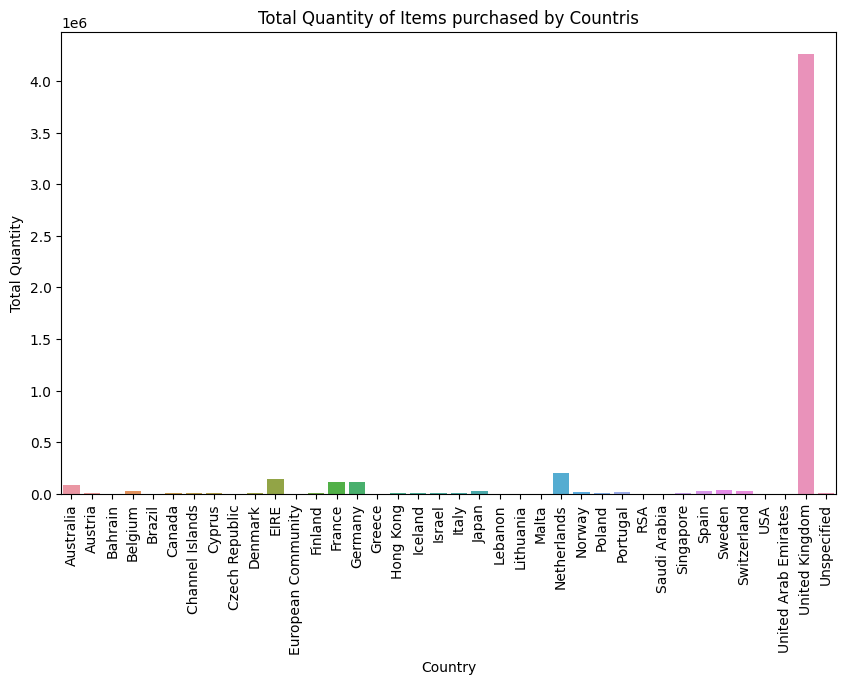

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_table.index, y='Quantity', data=pivot_table)
plt.xticks(rotation=90)
plt.title('Total Quantity of Items purchased by Countris')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.show()

## Popular items globally

In [13]:
popular_items = data.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
popular_items

,StockCode,Description,Quantity
0,10002,INFLATABLE POLITICAL GLOBE,860
1,10002,None,177
2,10080,GROOVY CACTUS INFLATABLE,303
3,10080,None,170
4,10080,check,22
...,...,...,...
5743,gift_0001_30,Dotcomgiftshop Gift Voucher �30.00,7
5744,gift_0001_30,None,30
5745,gift_0001_40,Dotcomgiftshop Gift Voucher �40.00,3
5746,gift_0001_50,Dotcomgiftshop Gift Voucher �50.00,4


In [14]:
top_items = popular_items.sort_values(by='Quantity', ascending=False).head(25)
top_items

,StockCode,Description,Quantity
3706,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
5262,85099B,JUMBO BAG RED RETROSPOT,47363
3878,84879,ASSORTED COLOUR BIRD ORNAMENT,36381
1574,22197,POPCORN HOLDER,36334
570,21212,PACK OF 72 RETROSPOT CAKE CASES,36039
5276,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025
2688,23084,RABBIT NIGHT LIGHT,30680
1900,22492,MINI PAINT SET VINTAGE,26437
2064,22616,PACK OF 12 LONDON TISSUES,26315
1322,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24753


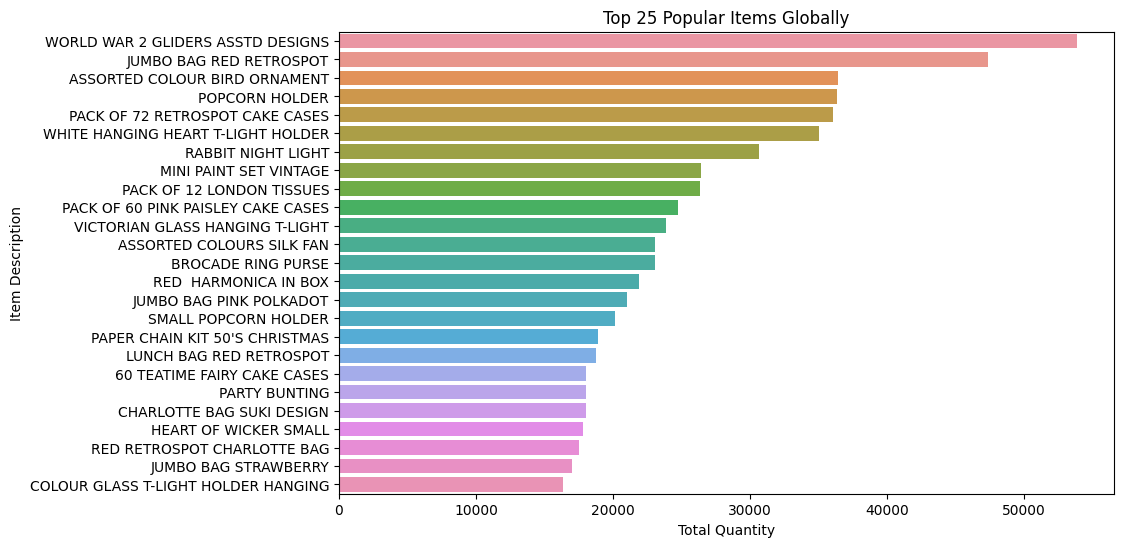

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_items)
plt.xlabel('Total Quantity')
plt.ylabel('Item Description')
plt.title('Top 25 Popular Items Globally')
plt.show()

# Popular Items country wise

Text(0.5, 1.0, 'Top 5 Countries with most sales ')

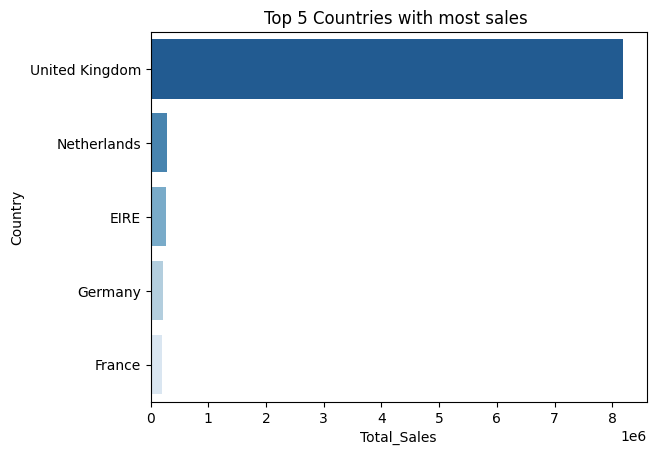

In [16]:
total_sales_per_country = data.groupby('Country')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_country.head(5), x='Total_Sales',y='Country',palette = 'Blues_r')
plt.title("Top 5 Countries with most sales ")

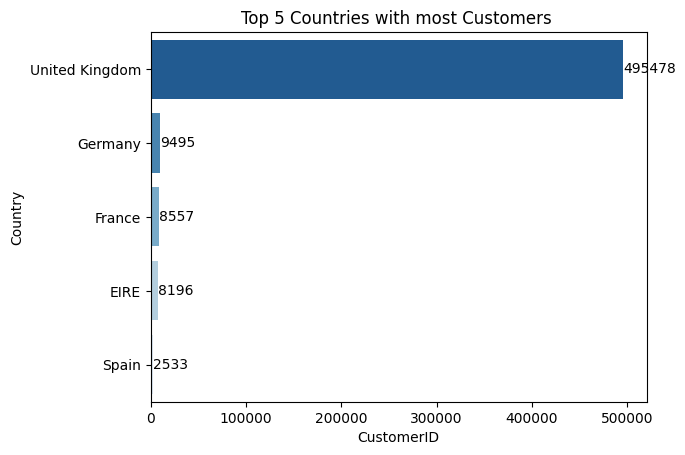

In [17]:
total_customer_per_country = data.groupby('Country')['CustomerID'].count().reset_index().sort_values('CustomerID',ascending=False)
z = sns.barplot(data=total_customer_per_country.head(5), x='CustomerID',y='Country',palette = 'Blues_r')
plt.title("Top 5 Countries with most Customers ")
for i in z.containers:
    z.bar_label(i,)

# Popular items month-wise

Text(0.5, 1.0, 'Sales per Year ')

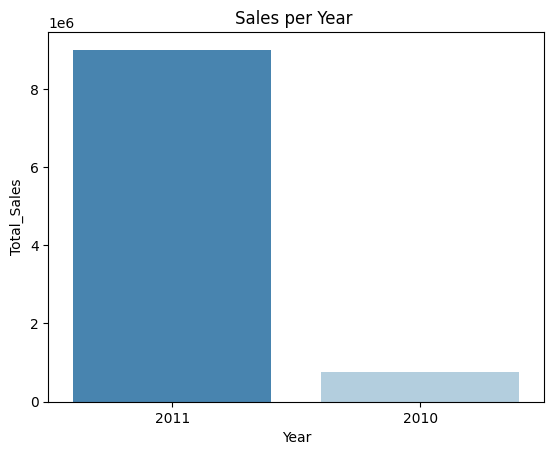

In [18]:
total_sales_per_year = data.groupby('Year')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_year, x='Year',y='Total_Sales',palette = 'Blues_r')
plt.title("Sales per Year ")

Text(0.5, 1.0, 'Sales per Month')

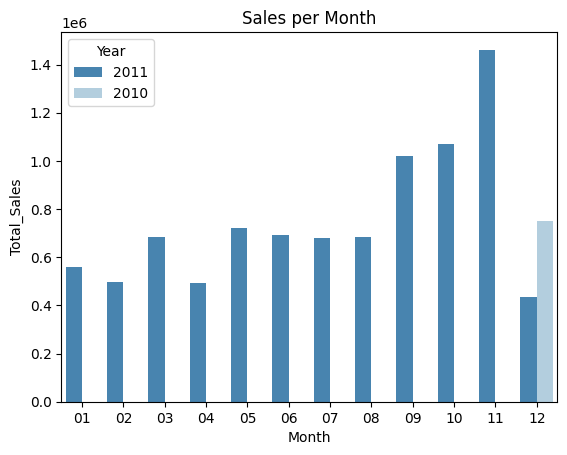

In [19]:
total_sales_per_month = data.groupby(['Month','Year'])['Total_Sales'].sum().reset_index()
z = sns.barplot(data=total_sales_per_month, y='Total_Sales',x='Month',hue='Year',palette = 'Blues_r')
plt.title("Sales per Month")

# Recommendation System

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
data.duplicated('Description')

0         False
1         False
2         False
3         False
4         False
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool

In [22]:
data.drop_duplicates('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
535327,581204,85104,????damages????,-355,2011-12-07 18:32:00,0.00,0,United Kingdom,2011,12,-0.00
535329,581206,21693,mixed up,-87,2011-12-07 18:34:00,0.00,0,United Kingdom,2011,12,-0.00
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,0,United Kingdom,2011,12,-0.00
537621,581334,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,2011-12-08 12:07:00,2.95,17841,United Kingdom,2011,12,11.80


In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34


In [24]:
data.groupby('Description').count()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales
Description,,,,,,,,,,
*Boombox Ipod Classic,1,1,1,1,1,1,1,1,1,1
*USB Office Mirror Ball,2,2,2,2,2,2,2,2,2,2
10 COLOUR SPACEBOY PEN,327,327,327,327,327,327,327,327,327,327
12 COLOURED PARTY BALLOONS,170,170,170,170,170,170,170,170,170,170
12 DAISY PEGS IN WOOD BOX,84,84,84,84,84,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...,...
wrongly marked carton 22804,1,1,1,1,1,1,1,1,1,1
wrongly marked. 23343 in box,1,1,1,1,1,1,1,1,1,1
wrongly sold (22719) barcode,1,1,1,1,1,1,1,1,1,1


In [25]:
data.groupby('Description').count()['Quantity'].reset_index()

,Description,Quantity
0,*Boombox Ipod Classic,1
1,*USB Office Mirror Ball,2
2,10 COLOUR SPACEBOY PEN,327
3,12 COLOURED PARTY BALLOONS,170
4,12 DAISY PEGS IN WOOD BOX,84
...,...,...
4206,wrongly marked carton 22804,1
4207,wrongly marked. 23343 in box,1
4208,wrongly sold (22719) barcode,1
4209,wrongly sold as sets,1


In [26]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

In [27]:
netQuantity=data.groupby('Description')['Quantity'].mean().reset_index()
netQuantity.rename(columns={'Quantity':'Net Quantity'},inplace=True)
netQuantity.head()

,Description,Net Quantity
0,*Boombox Ipod Classic,1.000000
1,*USB Office Mirror Ball,1.000000
2,10 COLOUR SPACEBOY PEN,19.547401
3,12 COLOURED PARTY BALLOONS,12.558824
4,12 DAISY PEGS IN WOOD BOX,4.154762


In [28]:
quantity_df=data.groupby('Description').count()['Quantity'].reset_index()

In [29]:
popular_df = quantity_df.merge(netQuantity,on = 'Description')

In [30]:
popular_df=popular_df[popular_df['Quantity']>=100].sort_values('Net Quantity',ascending=False)
popular_df

,Description,Quantity,Net Quantity
3998,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708
575,BROCADE RING PURSE,245,94.093878
1476,GIRLS ALPHABET IRON ON PATCHES,148,93.797297
246,"ASSORTED FLOWER COLOUR ""LEIS""",111,92.927928
2149,MINI PAINT SET VINTAGE,390,67.787179
...,...,...,...
1086,DOTCOM POSTAGE,709,0.997179
669,CARRIAGE,143,0.979021
3003,ROTATING SILVER ANGELS T-LIGHT HLDR,475,0.210526
2293,None,1454,-9.359697


In [31]:
popular_df.merge(data,on='Description')

,Description,Quantity_x,Net Quantity,InvoiceNo,StockCode,Quantity_y,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536615,84077,48,2010-12-02 10:09:00,0.29,14047,United Kingdom,2010,12,13.92
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536618,84077,48,2010-12-02 10:17:00,0.29,17017,United Kingdom,2010,12,13.92
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536830,84077,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,2010,12,518.40
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536839,84077,288,2010-12-02 18:25:00,0.21,15093,United Kingdom,2010,12,60.48
4,WORLD WAR 2 GLIDERS ASSTD DESIGNS,542,99.348708,536856,84077,48,2010-12-03 10:26:00,0.29,13370,United Kingdom,2010,12,13.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465158,check,159,-75.660377,581202,23404,41,2011-12-07 18:30:00,0.00,0,United Kingdom,2011,12,0.00
465159,check,159,-75.660377,581208,72801C,-10,2011-12-07 18:35:00,0.00,0,United Kingdom,2011,12,-0.00
465160,check,159,-75.660377,581210,23395,-26,2011-12-07 18:36:00,0.00,0,United Kingdom,2011,12,-0.00
465161,check,159,-75.660377,581211,22142,14,2011-12-07 18:36:00,0.00,0,United Kingdom,2011,12,0.00


In [32]:
data.groupby('CustomerID').count()['Quantity'].reset_index()

,CustomerID,Quantity
0,0,135080
1,12346,2
2,12347,182
3,12348,31
4,12349,73
...,...,...
4368,18280,10
4369,18281,7
4370,18282,13
4371,18283,756


In [33]:
x=data.groupby('CustomerID').count()['Quantity']>100
pro=x[x].index
filtered_rating = data[data['CustomerID'].isin(pro)]
filtered_rating.groupby('Description').count()['Quantity']

Description
*Boombox Ipod Classic             1
*USB Office Mirror Ball           2
10 COLOUR SPACEBOY PEN          250
12 COLOURED PARTY BALLOONS      133
12 DAISY PEGS IN WOOD BOX        74
                               ... 
wrongly marked carton 22804       1
wrongly marked. 23343 in box      1
wrongly sold (22719) barcode      1
wrongly sold as sets              1
wrongly sold sets                 1
Name: Quantity, Length: 4151, dtype: int64

In [34]:
y = filtered_rating.groupby('Description').count()['Quantity']>=50
famous_pro = y[y].index
famous_pro

Index(['10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       '12 IVORY ROSE PEG PLACE SETTINGS', '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCIL SMALL TUBE WOODLAND', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE SKULL', '12 PENCILS TALL TUBE POSY',
       ...
       'ZINC FOLKART SLEIGH BELLS', 'ZINC HEART FLOWER T-LIGHT HOLDER',
       'ZINC HEART LATTICE T-LIGHT HOLDER', 'ZINC HERB GARDEN CONTAINER',
       'ZINC METAL HEART DECORATION', 'ZINC SWEETHEART WIRE LETTER RACK',
       'ZINC T-LIGHT HOLDER STAR LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL',
       'ZINC WILLIE WINKIE  CANDLE STICK', 'check'],
      dtype='object', name='Description', length=2047)

In [35]:
filtered_rating['Description'].isin(famous_pro)

0         True
1         True
2         True
3         True
4         True
          ... 
541889    True
541890    True
541891    True
541892    True
541893    True
Name: Description, Length: 430698, dtype: bool

In [36]:
result = filtered_rating[filtered_rating['Description'].isin(famous_pro)]
result

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,2011,12,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,2011,12,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,2011,12,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,2011,12,214.80


In [37]:
pt = result.pivot_table(index='Description',columns='CustomerID',values='Quantity')
pt.fillna(0,inplace=True)
pt

CustomerID,0,12347,12357,12359,12360,12362,12370,12378,12380,12395,...,18226,18229,18231,18235,18241,18245,18257,18260,18272,18283
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,3.766234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.5
12 COLOURED PARTY BALLOONS,1.875000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 DAISY PEGS IN WOOD BOX,1.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
12 EGG HOUSE PAINTED WOOD,1.085714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 IVORY ROSE PEG PLACE SETTINGS,3.859649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC SWEETHEART WIRE LETTER RACK,1.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC T-LIGHT HOLDER STAR LARGE,1.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC T-LIGHT HOLDER STARS SMALL,5.270270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
simScore =cosine_similarity(pt)
simScore.shape

(2047, 2047)

In [39]:
def recommend(product_name):
    index = np.where(pt.index==product_name)[0][0]
    similar_items=sorted(list(enumerate(simScore[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])

# Call the function with product name which recommend/predict/suggest the similar product names
# For examples are given below

In [40]:
recommend('CHILDRENS CUTLERY DOLLY GIRL')

SPACEBOY BEAKER
DOLLY GIRL BEAKER
SPACEBOY MINI BACKPACK
WOODLAND MINI BACKPACK
FOOD CONTAINER SET 3 LOVE HEART


In [41]:
recommend('10 COLOUR SPACEBOY PEN')

3 PIECE SPACEBOY COOKIE CUTTER SET
ZINC  HEART T-LIGHT HOLDER
LOVE HEART SOCK HANGER
JAM CLOCK MAGNET
DOLLY GIRL LUNCH BOX


In [42]:
recommend('12 EGG HOUSE PAINTED WOOD')

CHARLIE+LOLA RED HOT WATER BOTTLE
FOLKART HEART NAPKIN RINGS
EASTER DECORATION HANGING BUNNY
6 EGG HOUSE PAINTED WOOD
HANGING FAIRY CAKE DECORATION


In [43]:
recommend('FOLKART HEART NAPKIN RINGS')

EASTER DECORATION HANGING BUNNY
CHARLIE+LOLA RED HOT WATER BOTTLE
HANGING FAIRY CAKE DECORATION
S/12 MINI RABBIT EASTER
SET OF PICTURE FRAME  STICKERS
